# Chess Dataset Naive Bayes Algorithm

## 1. Introduction

The goal of this project is to apply Naive Bayes classification techniques on the Lichess chess dataset to predict the victory status of games, which includes outcomes such as checkmate, resignation, timeout, or draw. By analyzing various features such as player ratings, the number of moves, opening strategies, and game duration, we aim to identify the factors most strongly associated with each victory type. We will explore the suitability of different Naive Bayes models—GaussianNB, MultinomialNB, and BernoulliNB—for this dataset, comparing their performance to determine which model best captures the patterns in game outcomes. By testing these models, we can assess how different assumptions about feature distribution affect predictive accuracy and interpret the model’s predictive power in determining victory status.


## 2. Preprocessing Data

In this step, we prepare the chess dataset for analysis and model training.
<ol>
<li>We load the dataset and clean it by removing irrelevant columns (id) and separating our target variable (opening_eco) from the features.</li>
<li> We apply label encoding the categorical values to transform these categories into numeric values. </li> 
<li> We split the processed data into training and test sets, reserving 20% of the data for testing </li>

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Load dataset
data_path = '../../data/raw_data/chess/games.csv'  
df = pd.read_csv(data_path)  

# Drop irrelevant columns for this prediction task
x = df.drop(columns=['id', 'rated', 'created_at', 'last_move_at', 'victory_status',
       'winner', 'white_id',  'black_id','moves'])  
y = df['victory_status']  

# Encode categorical features as numeric values
label_encoder = preprocessing.LabelEncoder()  
x = x.apply(label_encoder.fit_transform)  
y = label_encoder.fit_transform(y)

# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=4)  


## 3. Model Selection


In [14]:
# List of Naive Bayes models to try
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB()
}

# Function to evaluate each model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")


Evaluating GaussianNB...
Accuracy: 0.5424
Precision: 0.4936
Recall: 0.5424
F1 Score: 0.4914

Evaluating MultinomialNB...
Accuracy: 0.3504
Precision: 0.4839
Recall: 0.3504
F1 Score: 0.3742

Evaluating BernoulliNB...
Accuracy: 0.5394
Precision: 0.5015
Recall: 0.5394
F1 Score: 0.4126


## 4. Hyperparameter Tuning

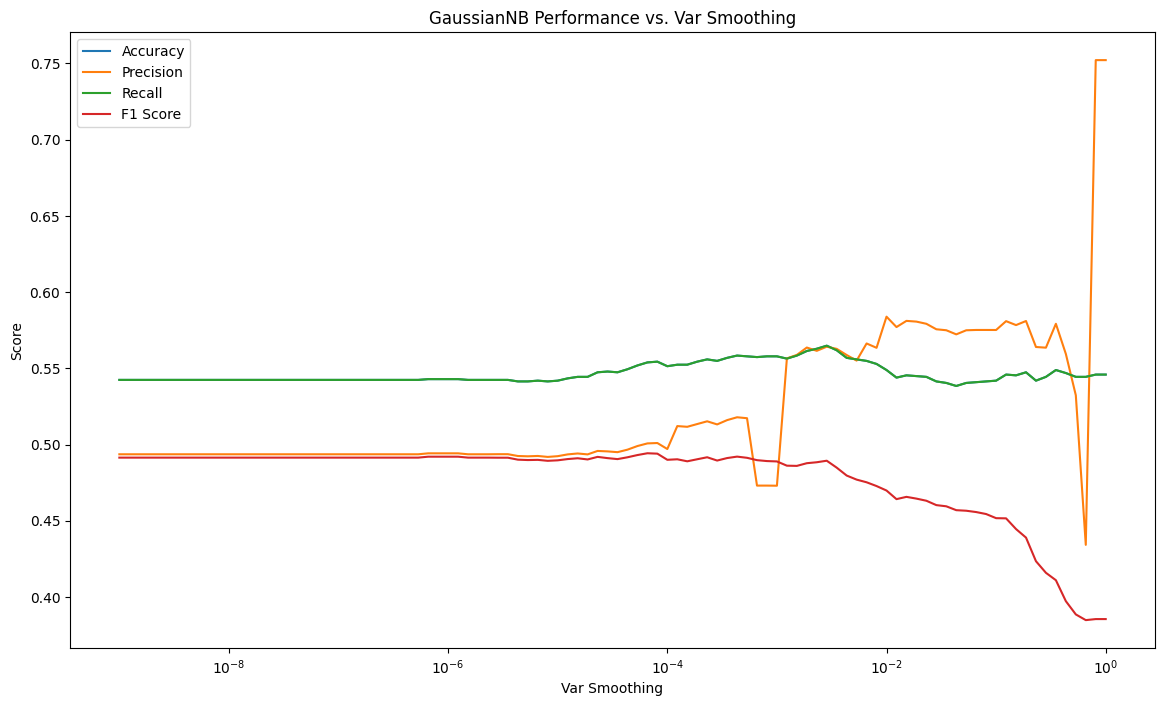

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.001873817422860383)


In [15]:
# List of var_smoothing values to test
var_smoothing_values = np.logspace(0,-9, num=100)

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Store results
results = {
    "var_smoothing": [],
    "accuracy": [],
    "precision": [],
    "recall": [],
    "f1_score": []
}

# Experiment with different var_smoothing values
for var_smoothing in var_smoothing_values:
    # Initialize GaussianNB with current var_smoothing
    model = GaussianNB(var_smoothing=var_smoothing)
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test)
    
    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
    
    # Store results
    results["var_smoothing"].append(var_smoothing)
    results["accuracy"].append(accuracy)
    results["precision"].append(precision)
    results["recall"].append(recall)
    results["f1_score"].append(f1)

# Convert results to DataFrame for easier visualization
results_df = pd.DataFrame(results)

# Plot results
plt.figure(figsize=(14, 8))
plt.plot(results_df["var_smoothing"], results_df["accuracy"], label="Accuracy")
plt.plot(results_df["var_smoothing"], results_df["precision"], label="Precision")
plt.plot(results_df["var_smoothing"], results_df["recall"], label="Recall")
plt.plot(results_df["var_smoothing"], results_df["f1_score"], label="F1 Score")
plt.xscale('log')
plt.xlabel("Var Smoothing")
plt.ylabel("Score")
plt.title("GaussianNB Performance vs. Var Smoothing")
plt.legend()
plt.show()

# Calculate best Value
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(x_train, y_train)
print(nbModel_grid.best_estimator_)

### Evaluating Model Stability using Cross-Validation
`cross_validate performs` k-fold cross-validation, here with cv=5, and returns both training and testing scores for each fold.

We compute the average of the `train_score` and `test_score` across all folds to get an overall sense of the model's performance.

This approach provides a robust evaluation of how well the model generalizes, with training and testing scores averaged over multiple splits.



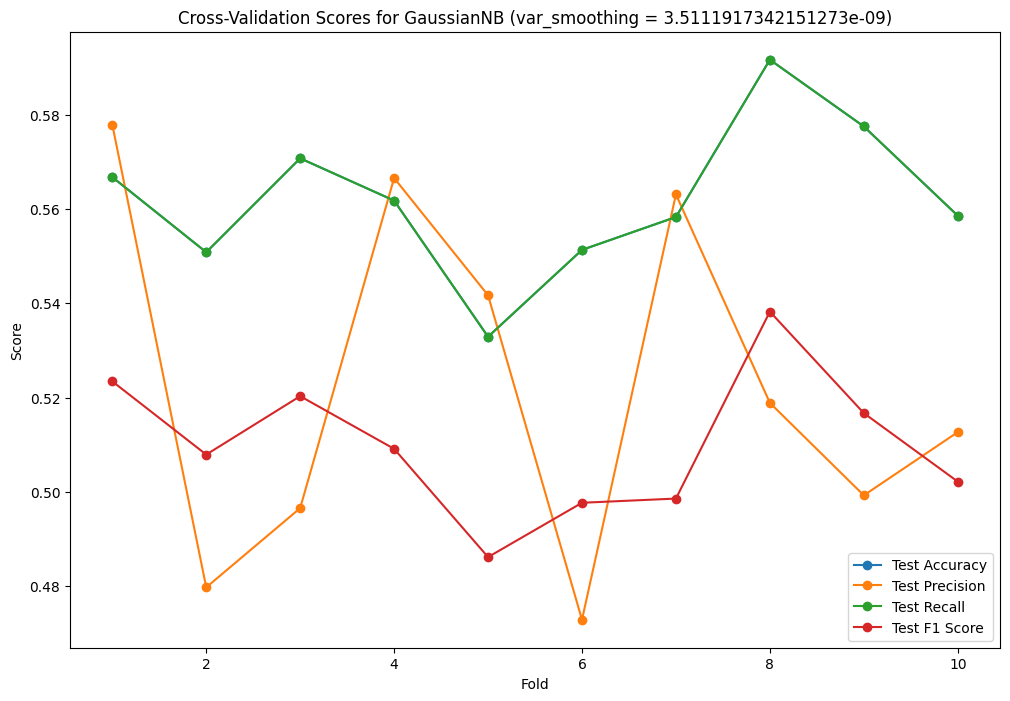

Average Training Accuracy: 0.5645129190904753
Average Testing Accuracy: 0.5620705961914754
Average Training Precision: 0.5133660346647059
Average Testing Precision: 0.5229109078611058
Average Training Recall: 0.5645129190904753
Average Testing Recall: 0.5620705961914754
Average Training F1 Score: 0.5132546829116877
Average Testing F1 Score: 0.5100060861668974


In [16]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate

# Define custom scoring functions with zero_division=1 to handle undefined cases
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision_weighted': make_scorer(precision_score, average='weighted', zero_division=1),
    'recall_weighted': make_scorer(recall_score, average='weighted',zero_division=1),
    'f1_weighted': make_scorer(f1_score, average='weighted', zero_division=1)
}

# Perform k-fold cross-validation (using k=10) with custom scoring
cv_results = cross_validate(
    model, x, y, cv=10, scoring=scoring, return_train_score=True
)

# Calculate average scores for each metric across all folds
avg_train_accuracy = np.mean(cv_results['train_accuracy'])
avg_test_accuracy = np.mean(cv_results['test_accuracy'])
avg_train_precision = np.mean(cv_results['train_precision_weighted'])
avg_test_precision = np.mean(cv_results['test_precision_weighted'])
avg_train_recall = np.mean(cv_results['train_recall_weighted'])
avg_test_recall = np.mean(cv_results['test_recall_weighted'])
avg_train_f1 = np.mean(cv_results['train_f1_weighted'])
avg_test_f1 = np.mean(cv_results['test_f1_weighted'])

# Plot cross-validation results
folds = range(1, 11)

plt.figure(figsize=(12, 8))
plt.plot(folds, cv_results['test_accuracy'], label="Test Accuracy", marker='o')
plt.plot(folds, cv_results['test_precision_weighted'], label="Test Precision", marker='o')
plt.plot(folds, cv_results['test_recall_weighted'], label="Test Recall", marker='o')
plt.plot(folds, cv_results['test_f1_weighted'], label="Test F1 Score", marker='o')
plt.xlabel("Fold")
plt.ylabel("Score")
plt.title("Cross-Validation Scores for GaussianNB (var_smoothing = 3.5111917342151273e-09)")
plt.legend()
plt.show()

# Display average scores
print("Average Training Accuracy:", avg_train_accuracy)
print("Average Testing Accuracy:", avg_test_accuracy)
print("Average Training Precision:", avg_train_precision)
print("Average Testing Precision:", avg_test_precision)
print("Average Training Recall:", avg_train_recall)
print("Average Testing Recall:", avg_test_recall)
print("Average Training F1 Score:", avg_train_f1)
print("Average Testing F1 Score:", avg_test_f1)


### Evaluating Train - Test Split Ratios

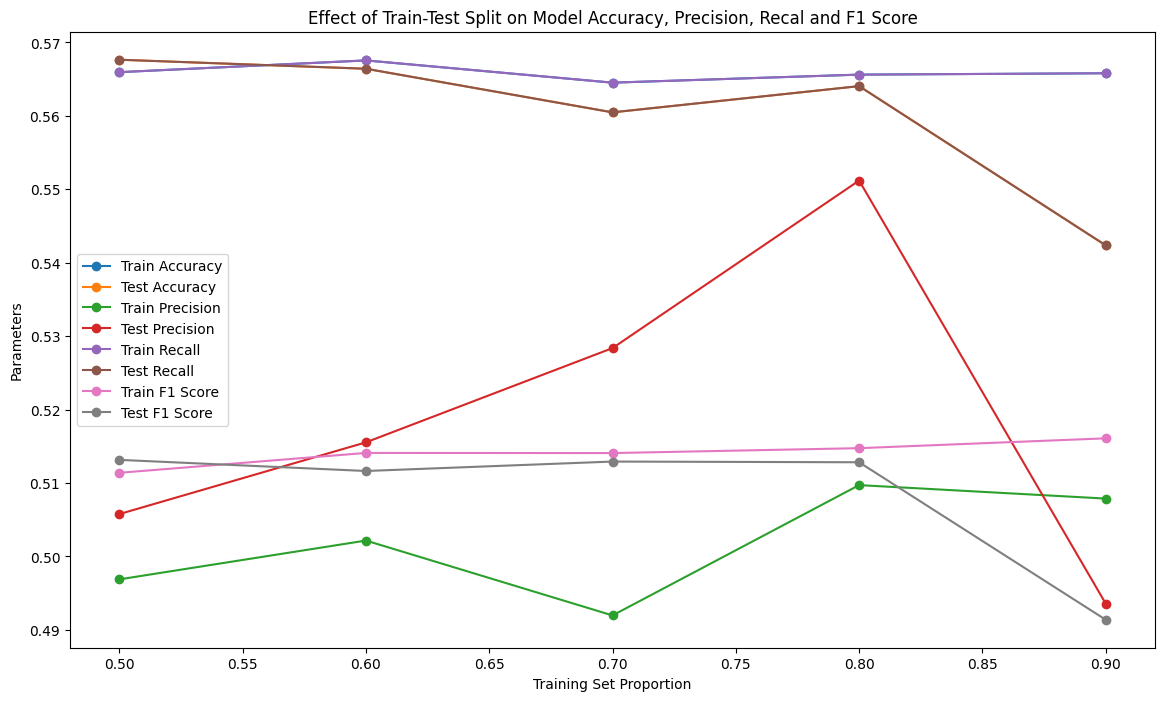

In [17]:

# Define different train-test split ratios to test
split_ratios = [0.5, 0.6, 0.7, 0.8, 0.9]

# Store results
results = {
    "split_ratio": [],
    "train_accuracy": [],
    "test_accuracy": [],
    "train_precision": [],
    "test_precision": [],
    "train_recall": [],
    "test_recall": [],
    "train_f1_score": [],
    "test_f1_score": []
}

# Iterate over each split ratio
for ratio in split_ratios:
    # Split the dataset according to the current ratio
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=ratio, random_state=42)
    
    # Initialize Gaussian Naive Bayes model with the chosen var_smoothing
    model = GaussianNB(var_smoothing=3.5111917342151273e-09)
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Predict on both train and test sets
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate performance metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=1)
    test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=1)
    train_recall = recall_score(y_train, y_train_pred, average='weighted',zero_division=1)
    test_recall = recall_score(y_test, y_test_pred, average='weighted',zero_division=1)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=1)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=1)
    
    # Store results
    results["split_ratio"].append(ratio)
    results["train_accuracy"].append(train_accuracy)
    results["test_accuracy"].append(test_accuracy)
    results["train_precision"].append(train_precision)
    results["test_precision"].append(test_precision)
    results["train_recall"].append(train_recall)
    results["test_recall"].append(test_recall)
    results["train_f1_score"].append(train_f1)
    results["test_f1_score"].append(test_f1)

# Convert results to DataFrame for easier visualization
results_df = pd.DataFrame(results)

# Plot results
plt.figure(figsize=(14, 8))

# Accuracy plot
plt.plot(results_df["split_ratio"], results_df["train_accuracy"], label="Train Accuracy", marker='o')
plt.plot(results_df["split_ratio"], results_df["test_accuracy"], label="Test Accuracy", marker='o')
plt.plot(results_df["split_ratio"], results_df["train_precision"], label="Train Precision", marker='o')
plt.plot(results_df["split_ratio"], results_df["test_precision"], label="Test Precision", marker='o')
plt.plot(results_df["split_ratio"], results_df["train_recall"], label="Train Recall", marker='o')
plt.plot(results_df["split_ratio"], results_df["test_recall"], label="Test Recall", marker='o')
plt.plot(results_df["split_ratio"], results_df["train_f1_score"], label="Train F1 Score", marker='o')
plt.plot(results_df["split_ratio"], results_df["test_f1_score"], label="Test F1 Score", marker='o')
plt.xlabel("Training Set Proportion")
plt.ylabel("Parameters")
plt.title("Effect of Train-Test Split on Model Accuracy, Precision, Recal and F1 Score")
plt.legend()
plt.show()

## 5. Visualisation 

In [19]:
# Initialize Gaussian Naive Bayes model
model = GaussianNB(var_smoothing=3.5111917342151273e-09)

# Train the model
model.fit(x_train, y_train)

# Make predictions on test data
y_pred = model.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.54


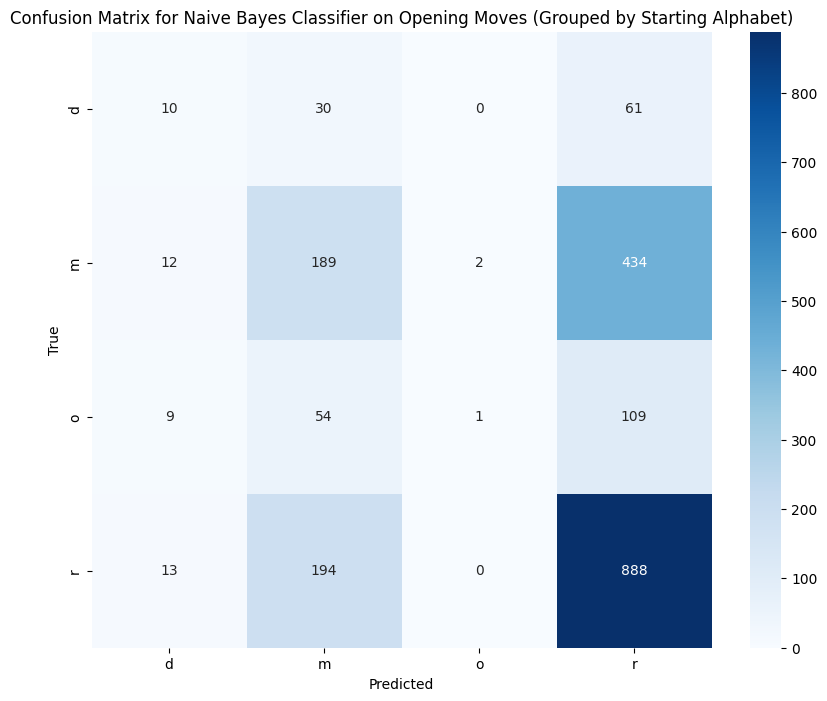

In [20]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
 
# Map the target labels (opening_eco) to their starting letters
y_test_grouped = np.array([label[0] for label in label_encoder.inverse_transform(y_test)])
y_pred_grouped = np.array([label[0] for label in label_encoder.inverse_transform(y_pred)])

# Create a confusion matrix for the grouped labels
grouped_conf_matrix = confusion_matrix(y_test_grouped, y_pred_grouped, labels=np.unique(y_test_grouped))

# Plot the grouped confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(grouped_conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=np.unique(y_test_grouped), yticklabels=np.unique(y_test_grouped))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Naive Bayes Classifier on Opening Moves (Grouped by Starting Alphabet)")
plt.show()
